In [10]:
from numpy import sin,cos ,arange,zeros,empty,array,pi,linspace,meshgrid,sqrt
from numpy.random import normal

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('seaborn-whitegrid')
%matplotlib notebook

# Problem 8.1

In [11]:
def vin(t):
    if (2*t//1)%2==0:
        v=1
    else:
        v=-1
    return(v)

In [12]:
def f(Vo,t,RC):
    
    return 1/RC*(vin(t)-Vo)

In [13]:
def rk4v2(x0,tpoints,*argv):
    """*argv here sends info onto f(x,argv)"""
    h=tpoints[1]-tpoints[0]
    N=len(tpoints)
    vpoints=zeros(N,float)
    xpoints=zeros(N,float)
    xpoints[0]=x0
    for i,t in enumerate(tpoints[:-1]):
        
        k1=h*f(xpoints[i],t,*argv)
        k2=h*f(xpoints[i]+.5*k1,t+.5*h,*argv)
        k3=h*f(xpoints[i]+.5*k2,t+.5*h,*argv)
        k4=h*f(xpoints[i]+k3, t+h,*argv)
        xpoints[i+1]=xpoints[i]+(k1+2*k2+2*k3+k4)/6
        vpoints[i]=f(xpoints[i],t,*argv)
    return xpoints,vpoints

<IPython.core.display.Javascript object>


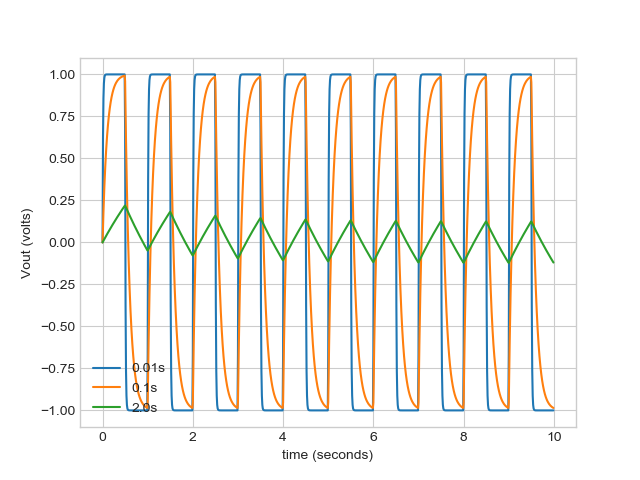

In [14]:
# set up time
tf=10.
t0=0.
N=1000
h=(tf-t0)/N
tpoints=arange(t0,tf,h)
x0=0
RC=[0.01,0.1,2.]
for i in RC:
    solution,vel=rk4v2(x0,tpoints,i)
    plt.plot(tpoints,solution,label=str(i)+"s")
plt.legend()
plt.xlabel("time (seconds)")
plt.ylabel("Vout (volts)")
plt.show()
#notice this acts just like a low-pass filter ought to and for large enough RC behaves like
# a differentiator. If you keep increasing RC, it gets better and better, but takes longer
#to settle down.

In [15]:
def rk4v4(ic,tpoints,*argv):
    N=len(tpoints)
    ypoints=zeros(N,float)
    xpoints=zeros(N,float)
    zpoints=zeros(N,float)
    xpoints[0]=ic[0]
    ypoints[1]=ic[1]
    zpoints[1]=ic[2]
    r=ic
   
    h=tpoints[1]-tpoints[0]
    
   
    for i,t in enumerate(tpoints[:-1]):
        
        k1=h*f2(r,t,*argv)
        k2=h*f2(r+.5*k1,t+.5*h,*argv)
        k3=h*f2(r+.5*k2,t+.5*h,*argv)
        k4=h*f2(r+k3, t+h,*argv)
        r+=(k1+2*k2+2*k3+k4)/6
        xpoints[i+1]=r[0]
        ypoints[i+1]=r[1]
        zpoints[i+1]=r[2]
    return array([xpoints,ypoints,zpoints])

In [16]:
def f2(vec,t,consts):
   
    x=vec[0]
    
    y=vec[1]
    z=vec[2]
    sigma=consts[0]
    r=consts[1]
    b=consts[2]
    dx=sigma*(y-x)
    dy=r*x-y-x*z
    dz=x*y-b*z
    return array([dx,dy,dz],float)

In [17]:
#set up our time array
t0=0.       #a in the book, but this makes more sense
tf=50.0   # b in the book, but this makes more sense
N=10000    # number of points to integrate
h=(tf-t0)/N   #step size
tpoints=arange(t0,tf,h)
constants=[10,28,8/3]
sol=rk4v4([1,1,0],tpoints,constants)

<IPython.core.display.Javascript object>


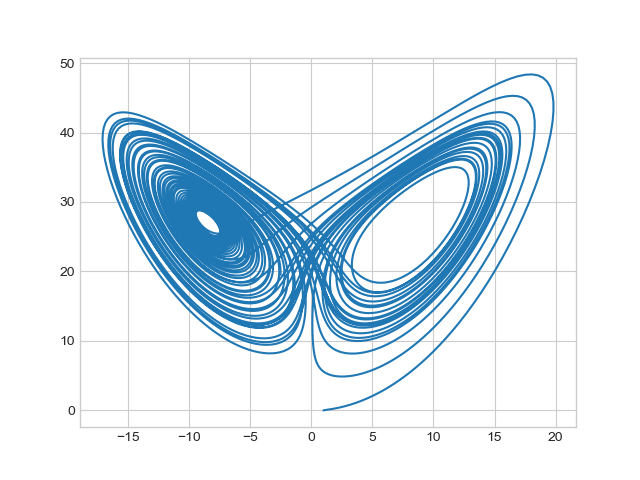

In [18]:
fig = plt.figure()
ax = plt.axes()
ax.plot(sol[0],sol[2])



<IPython.core.display.Javascript object>


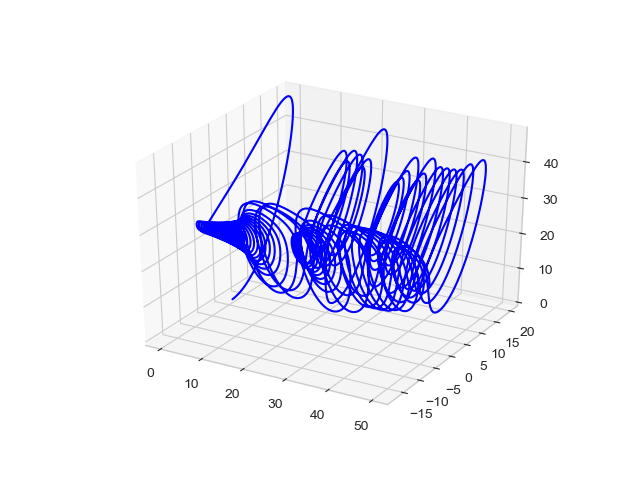

In [19]:
fig=plt.figure()
ax = plt.axes(projection='3d')


ax.plot3D(tpoints, sol[0], sol[2],"blue")


<IPython.core.display.Javascript object>


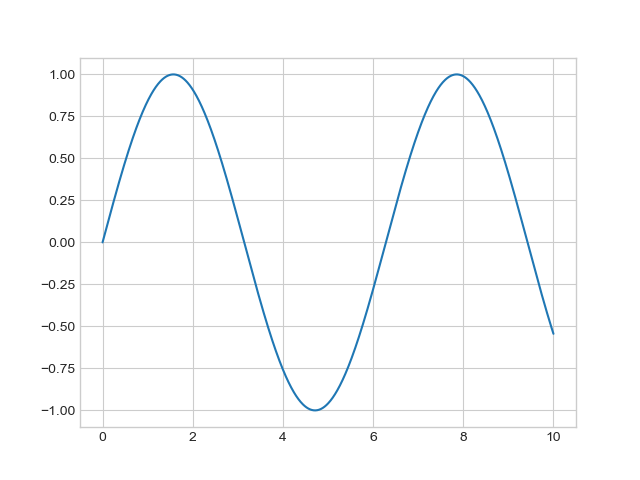

In [20]:
fig = plt.figure()
ax = plt.axes()

x = linspace(0, 10, 1000)
ax.plot(x, sin(x))